# Wildfire Susceptibility Mapping Project

This project aims to predict wildfire susceptibility using a variety of features, applying machine learning (ML) and deep learning (DL) algorithms. The data includes geographic, topographical, climatic, and vegetation indices.

## Steps Overview

The project follows a structured approach with the following steps:

### 1. Data Preprocessing

- **One-Hot Encoding**: Categorical variables are transformed into a numerical format.
- **Normalization/Standardization**: Numerical features are scaled appropriately.

### 2. Multi-Collinearity analysis

- **VIF**: Calculate VIF for each feature to quantify the severity of multi collinearity.

### 3. Outlier Detection

- Outlier detection algorithms are applied to identify and handle anomalous data points.

### 4. Feature Importance

- Feature importance is assessed using tree-based algorithms like Random Forest.

### 5. Model Training

- ML and DL models are trained using cross-validation for robust performance assessment.

### 6. Model Evaluation

- Models are evaluated using accuracy, AUC-ROC, F1-score, and other relevant metrics.

### 7. Comparative Analysis

- The impact of outlier detection on model performance is analyzed.
- Models trained on data with and without outlier treatment are compared.

### 8. Results Interpretation and Reporting

- Results are interpreted, and conclusions are drawn regarding wildfire susceptibility.
- Detailed documentation and reporting of findings are provided.

## Dataset

The dataset includes the following features:

- Geographic coordinates (X, Y)
- Topographical features (TWI, slope, elevation, aspect)
- Vegetation index (NDVI)
- Land use (LULC)
- Proximity measures (distance to lake, road, river)
- Climatic data (temperature in July, maximum temperature, soil moisture, precipitation, evapotranspiration in August)


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
train = pd.read_csv('Training_data.csv')

In [3]:
train.head()

,OBJECTID,Training_fire_point,X,Y,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,aspect,road,river,pcp
0,1,1,9.779328e+05,-171014.66810,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,2,1,1.347033e+06,-80014.66811,-6.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,3,1,9.444328e+05,-50014.66811,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,6.0,2.0,4.0,3.0
3,4,1,9.470328e+05,-50814.66811,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,5,1,9.414328e+05,-51414.66811,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0


In [4]:
test = pd.read_csv('Testing_data.csv')

In [5]:
test.head()

,OBJECTID,testing_fire_Point,X,Y,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,aspect,road,river,pcp
0,1,1,1.104417e+06,-41066.374270,-219.0,4.0,5.0,3.0,4.0,5.0,4,4,5,3.0,4.0,2,4,3.0
1,2,1,2.347017e+06,-47066.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,4,1.0,4.0,0,5,4.0
2,3,1,2.353017e+06,-47366.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,5,1.0,4.0,0,5,4.0
3,4,1,7.265169e+05,9933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,1,4,3.0
4,5,1,7.247169e+05,6933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,0,4,3.0


In [6]:
train['Training_fire_point'].value_counts()

1    14812
0    13713
Name: Training_fire_point, dtype: int64

In [7]:
test['testing_fire_Point'].value_counts()

1    3708
0    3441
Name: testing_fire_Point, dtype: int64

In [8]:
train.shape

(28525, 18)

In [9]:
test.shape

(7149, 18)

In [10]:
train.columns

Index(['OBJECTID', 'Training_fire_point', 'X', 'Y', 'twi', 'tmaxjuly_2',
       'tmax', 'soilmois', 'slope', 'ndvi', 'lulc', 'lake', 'evt_aug',
       'elevation', 'aspect', 'road', 'river', 'pcp'],
      dtype='object')

In [11]:
test.columns

Index(['OBJECTID', 'testing_fire_Point', 'X', 'Y', 'twi', 'tmaxjuly_2', 'tmax',
       'soilmois', 'slope', 'ndvi', 'lulc', 'lake', 'evt_aug', 'elevation',
       'aspect', 'road', 'river', 'pcp'],
      dtype='object')

In [12]:
df_train = pd.read_csv('Training_data.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'TWI', 'temp_july', 'temp_max', 'soilmois', 
                                                   'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road',
                                                    'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [13]:
df_train

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,1,9.779328e+05,-1.710147e+05,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,2,1,1.347033e+06,-8.001467e+04,-6.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,3,1,9.444328e+05,-5.001467e+04,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,6.0,2.0,4.0,3.0
3,4,1,9.470328e+05,-5.081467e+04,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,5,1,9.414328e+05,-5.141467e+04,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28520,28521,0,-1.565730e+06,2.817666e+06,129.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,1.0,1.0,2.0,4.0,5.0,1.0
28521,28522,0,-1.603130e+06,2.835066e+06,-6.0,1.0,1.0,1.0,5.0,2.0,5.0,5.0,1.0,2.0,6.0,4.0,5.0,1.0
28522,28523,0,-1.595730e+06,2.834666e+06,-219.0,1.0,1.0,1.0,4.0,2.0,5.0,5.0,1.0,2.0,3.0,4.0,5.0,1.0
28523,28524,0,-1.593430e+06,2.829566e+06,-219.0,1.0,1.0,1.0,5.0,2.0,3.0,5.0,1.0,2.0,5.0,4.0,5.0,1.0


In [14]:
df_test = pd.read_csv('Testing_data.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'TWI', 'temp_july', 'temp_max', 'soilmois', 
                                                   'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road',
                                                    'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [15]:
df_test

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,1,1.104417e+06,-4.106637e+04,-219.0,4.0,5.0,3.0,4.0,5.0,4,4,5,3.0,4.0,2,4,3.0
1,2,1,2.347017e+06,-4.706637e+04,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,4,1.0,4.0,0,5,4.0
2,3,1,2.353017e+06,-4.736637e+04,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,5,1.0,4.0,0,5,4.0
3,4,1,7.265169e+05,9.933626e+03,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,1,4,3.0
4,5,1,7.247169e+05,6.933626e+03,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,0,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7144,7145,0,-1.592123e+06,2.814265e+06,-219.0,1.0,1.0,1.0,5.0,2.0,8,5,1,3.0,6.0,4,5,1.0
7145,7146,0,-1.574423e+06,2.816265e+06,129.0,1.0,1.0,1.0,4.0,2.0,5,5,1,2.0,3.0,4,5,1.0
7146,7147,0,-1.569823e+06,2.816165e+06,129.0,1.0,1.0,1.0,3.0,2.0,3,5,1,1.0,3.0,4,5,1.0
7147,7148,0,-1.590823e+06,2.839065e+06,-6.0,1.0,1.0,1.0,3.0,2.0,3,5,1,1.0,2.0,4,5,1.0


In [16]:
df_train.dtypes

OBJECTID        int64
Wildfire        int64
X             float64
Y             float64
TWI           float64
temp_july     float64
temp_max      float64
soilmois      float64
slope         float64
ndvi          float64
lulc          float64
dist_lake     float64
evt_aug       float64
elevation     float64
aspect        float64
dist_road     float64
dist_river    float64
pcp           float64
dtype: object

In [17]:
df_test.dtypes

OBJECTID        int64
Wildfire        int64
X             float64
Y             float64
TWI           float64
temp_july     float64
temp_max      float64
soilmois      float64
slope         float64
ndvi          float64
lulc            int64
dist_lake       int64
evt_aug         int64
elevation     float64
aspect        float64
dist_road       int64
dist_river      int64
pcp           float64
dtype: object

In [18]:
{col: df_train[col].nunique() for col in df_train}

{'OBJECTID': 28525,
 'Wildfire': 2,
 'X': 19837,
 'Y': 19220,
 'TWI': 5,
 'temp_july': 5,
 'temp_max': 5,
 'soilmois': 5,
 'slope': 5,
 'ndvi': 5,
 'lulc': 10,
 'dist_lake': 5,
 'evt_aug': 5,
 'elevation': 5,
 'aspect': 6,
 'dist_road': 5,
 'dist_river': 5,
 'pcp': 5}

In [19]:
{col: df_test[col].nunique() for col in df_test}

{'OBJECTID': 7149,
 'Wildfire': 2,
 'X': 6435,
 'Y': 6361,
 'TWI': 5,
 'temp_july': 5,
 'temp_max': 5,
 'soilmois': 5,
 'slope': 5,
 'ndvi': 5,
 'lulc': 10,
 'dist_lake': 5,
 'evt_aug': 5,
 'elevation': 5,
 'aspect': 6,
 'dist_road': 5,
 'dist_river': 5,
 'pcp': 5}

In [20]:
df_train['pcp'].value_counts()

2.0    12206
1.0     8808
3.0     5468
4.0     1827
5.0      210
Name: pcp, dtype: int64

In [21]:
df_test['pcp'].value_counts()

2.0    3052
1.0    2259
3.0    1333
4.0     447
5.0      55
Name: pcp, dtype: int64

In [22]:
df_train['soilmois'].value_counts()

1.0    12759
2.0     8842
3.0     4769
4.0     1786
5.0      363
Name: soilmois, dtype: int64

In [23]:
df_test['soilmois'].value_counts()

1.0    3221
2.0    2212
3.0    1212
4.0     422
5.0      79
Name: soilmois, dtype: int64

In [24]:
df_train['aspect'].value_counts()

3.0    7242
5.0    6970
4.0    5960
6.0    3164
2.0    3078
1.0    2088
Name: aspect, dtype: int64

In [25]:
df_test['aspect'].value_counts()

3.0    1798
5.0    1729
4.0    1492
6.0     831
2.0     770
1.0     519
Name: aspect, dtype: int64

In [26]:
df_train['aspect'] = df_train['aspect'].replace(6, 2)

In [27]:
df_train['aspect'].value_counts()

3.0    7242
5.0    6970
2.0    6242
4.0    5960
1.0    2088
Name: aspect, dtype: int64

In [28]:
df_test['aspect'] = df_test['aspect'].replace(6, 2)

In [29]:
df_test['aspect'].value_counts()

3.0    1798
5.0    1729
2.0    1601
4.0    1492
1.0     519
Name: aspect, dtype: int64

In [30]:
df_train.columns

Index(['OBJECTID', 'Wildfire', 'X', 'Y', 'TWI', 'temp_july', 'temp_max',
       'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug',
       'elevation', 'aspect', 'dist_road', 'dist_river', 'pcp'],
      dtype='object')

In [31]:
df_train = df_train.astype(
    {
        'Wildfire': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'aspect': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [32]:
df_test = df_test.astype(
    {
        'Wildfire': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'aspect': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28525 entries, 0 to 28524
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    28525 non-null  int64   
 1   Wildfire    28525 non-null  category
 2   X           28525 non-null  float64 
 3   Y           28525 non-null  float64 
 4   TWI         28502 non-null  float64 
 5   temp_july   28513 non-null  category
 6   temp_max    28519 non-null  category
 7   soilmois    28519 non-null  category
 8   slope       28502 non-null  category
 9   ndvi        28522 non-null  category
 10  lulc        28522 non-null  category
 11  dist_lake   28523 non-null  category
 12  evt_aug     28523 non-null  category
 13  elevation   28502 non-null  category
 14  aspect      28502 non-null  category
 15  dist_road   28523 non-null  category
 16  dist_river  28523 non-null  category
 17  pcp         28519 non-null  category
dtypes: category(14), float64(3), int64(1)
memory u

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7149 entries, 0 to 7148
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    7149 non-null   int64   
 1   Wildfire    7149 non-null   category
 2   X           7149 non-null   float64 
 3   Y           7149 non-null   float64 
 4   TWI         7139 non-null   float64 
 5   temp_july   7146 non-null   category
 6   temp_max    7146 non-null   category
 7   soilmois    7146 non-null   category
 8   slope       7139 non-null   category
 9   ndvi        7146 non-null   category
 10  lulc        7149 non-null   category
 11  dist_lake   7149 non-null   category
 12  evt_aug     7149 non-null   category
 13  elevation   7139 non-null   category
 14  aspect      7139 non-null   category
 15  dist_road   7149 non-null   category
 16  dist_river  7149 non-null   category
 17  pcp         7146 non-null   category
dtypes: category(14), float64(3), int64(1)
memory usa

In [35]:
# Check for missing vaules
print(df_train.isnull().sum())

OBJECTID       0
Wildfire       0
X              0
Y              0
TWI           23
temp_july     12
temp_max       6
soilmois       6
slope         23
ndvi           3
lulc           3
dist_lake      2
evt_aug        2
elevation     23
aspect        23
dist_road      2
dist_river     2
pcp            6
dtype: int64


In [36]:
# Check for missing vaules
print(df_test.isnull().sum())

OBJECTID       0
Wildfire       0
X              0
Y              0
TWI           10
temp_july      3
temp_max       3
soilmois       3
slope         10
ndvi           3
lulc           0
dist_lake      0
evt_aug        0
elevation     10
aspect        10
dist_road      0
dist_river     0
pcp            3
dtype: int64


In [37]:
df_train[df_train.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
6,7,1,2.355633e+06,-5.011467e+04,NaN,3.0,5.0,3.0,NaN,5.0,11.0,5.0,5.0,NaN,NaN,0.0,5.0,4.0
15044,15045,0,1.067970e+06,-3.218339e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15128,15129,0,9.084699e+05,-2.232339e+05,-46.0,NaN,5.0,4.0,2.0,5.0,11.0,1.0,5.0,2.0,3.0,0.0,2.0,3.0
15162,15163,0,1.098170e+06,-2.207339e+05,-46.0,NaN,5.0,4.0,2.0,2.0,11.0,1.0,5.0,2.0,3.0,1.0,1.0,3.0
15163,15164,0,1.098370e+06,-2.214339e+05,-46.0,NaN,5.0,4.0,2.0,2.0,11.0,1.0,5.0,2.0,4.0,1.0,1.0,3.0
15613,15614,0,1.658870e+06,-9.973389e+04,NaN,5.0,5.0,2.0,NaN,3.0,1.0,4.0,5.0,NaN,NaN,0.0,3.0,3.0
15618,15619,0,1.670270e+06,-1.042339e+05,NaN,5.0,5.0,2.0,NaN,3.0,1.0,4.0,5.0,NaN,NaN,0.0,1.0,3.0
15638,15639,0,4.105699e+05,-8.783389e+04,-46.0,NaN,5.0,4.0,4.0,2.0,4.0,1.0,5.0,2.0,4.0,0.0,2.0,2.0
15774,15775,0,4.469699e+05,-2.383389e+04,-219.0,NaN,5.0,3.0,4.0,4.0,4.0,1.0,5.0,3.0,3.0,0.0,3.0,2.0
15859,15860,0,1.694670e+06,-1.183389e+04,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0,4.0,NaN,NaN,0.0,3.0,NaN


In [38]:
df_test[df_test.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
3779,3780,0,1099276.864,-2.210352e+05,-46.0,NaN,5.0,4.0,2.0,2.0,11,1,5,2.0,4.0,1,1,3.0
3889,3890,0,1656776.864,-1.078352e+05,NaN,5.0,5.0,2.0,NaN,3.0,1,4,5,NaN,NaN,0,3,3.0
3906,3907,0,1667476.864,-8.523515e+04,NaN,5.0,5.0,2.0,NaN,3.0,1,4,5,NaN,NaN,0,2,3.0
3907,3908,0,1670876.864,-8.873515e+04,NaN,5.0,5.0,2.0,NaN,3.0,11,4,5,NaN,NaN,1,1,3.0
4234,4235,0,2236376.864,2.618648e+05,NaN,5.0,5.0,3.0,NaN,5.0,4,5,5,NaN,NaN,1,5,4.0
4517,4518,0,-1902023.136,4.328648e+05,NaN,4.0,5.0,5.0,NaN,5.0,4,4,5,NaN,NaN,1,1,4.0
4548,4549,0,-1947223.136,4.487648e+05,NaN,4.0,5.0,4.0,NaN,5.0,4,4,5,NaN,NaN,0,1,4.0
4840,4841,0,2942776.864,7.680648e+05,NaN,2.0,5.0,2.0,NaN,5.0,11,5,4,NaN,NaN,2,5,4.0
4899,4900,0,2861376.864,8.542648e+05,NaN,3.0,5.0,2.0,NaN,5.0,3,5,4,NaN,NaN,0,5,4.0
4922,4923,0,2829976.864,8.940648e+05,NaN,4.0,5.0,3.0,NaN,5.0,4,5,4,NaN,NaN,0,4,4.0


In [39]:
# Drop rows with null values for TRAINING DATA
New_df_train = df_train.dropna()

In [40]:
New_df_train[New_df_train.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp


In [41]:
# Drop rows with null values for TESTING DATA
New_df_test = df_test.dropna()# Drop rows with null values for TESTING DATA

In [42]:
New_df_test[New_df_test.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp


In [43]:
New_df_train.head()

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,1,9.779328e+05,-171014.66810,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,2,1,1.347033e+06,-80014.66811,-6.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,3,1,9.444328e+05,-50014.66811,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,4.0,3.0
3,4,1,9.470328e+05,-50814.66811,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,5,1,9.414328e+05,-51414.66811,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0


In [44]:
New_df_test.head()

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,1,1.104417e+06,-41066.374270,-219.0,4.0,5.0,3.0,4.0,5.0,4,4,5,3.0,4.0,2,4,3.0
1,2,1,2.347017e+06,-47066.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,4,1.0,4.0,0,5,4.0
2,3,1,2.353017e+06,-47366.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,5,1.0,4.0,0,5,4.0
3,4,1,7.265169e+05,9933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,1,4,3.0
4,5,1,7.247169e+05,6933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,0,4,3.0


In [45]:
# Drop Object ID from Training data
columns_to_drop = ['OBJECTID']
New_df_train = New_df_train.drop(columns= columns_to_drop)

In [46]:
# Drop column "Object ID" from testing data
columns_to_drop = ['OBJECTID']
New_df_test = New_df_test.drop(columns= columns_to_drop)

In [47]:
New_df_train.head()

,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,9.779328e+05,-171014.66810,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,1,1.347033e+06,-80014.66811,-6.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,1,9.444328e+05,-50014.66811,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,4.0,3.0
3,1,9.470328e+05,-50814.66811,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,1,9.414328e+05,-51414.66811,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0


In [48]:
New_df_test.head()

,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,1.104417e+06,-41066.374270,-219.0,4.0,5.0,3.0,4.0,5.0,4,4,5,3.0,4.0,2,4,3.0
1,1,2.347017e+06,-47066.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,4,1.0,4.0,0,5,4.0
2,1,2.353017e+06,-47366.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,5,1.0,4.0,0,5,4.0
3,1,7.265169e+05,9933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,1,4,3.0
4,1,7.247169e+05,6933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,0,4,3.0


In [49]:
New_df_train

,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,9.779328e+05,-1.710147e+05,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,1,1.347033e+06,-8.001467e+04,-6.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,1,9.444328e+05,-5.001467e+04,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,4.0,3.0
3,1,9.470328e+05,-5.081467e+04,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,1,9.414328e+05,-5.141467e+04,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28520,0,-1.565730e+06,2.817666e+06,129.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,1.0,1.0,2.0,4.0,5.0,1.0
28521,0,-1.603130e+06,2.835066e+06,-6.0,1.0,1.0,1.0,5.0,2.0,5.0,5.0,1.0,2.0,2.0,4.0,5.0,1.0
28522,0,-1.595730e+06,2.834666e+06,-219.0,1.0,1.0,1.0,4.0,2.0,5.0,5.0,1.0,2.0,3.0,4.0,5.0,1.0
28523,0,-1.593430e+06,2.829566e+06,-219.0,1.0,1.0,1.0,5.0,2.0,3.0,5.0,1.0,2.0,5.0,4.0,5.0,1.0


## Multi-Collinearity Analysis (VIF)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):

    vifs = [variance_inflation_factor(New_df_train.values, i) for i in range(New_df_train.shape[1])]
    tolerance = [1/vif for vif in vifs]

    vif_data = pd.DataFrame(index=New_df_train.columns)
    vif_data['VIF'] = vifs
    vif_data['Tolerance'] = tolerance

    return vif_data

# Calculate VIF 
vif_data = calculate_vif(New_df_train)

print(vif_data)

                  VIF  Tolerance
Wildfire     4.838168   0.206690
X            3.503787   0.285405
Y           21.699731   0.046084
TWI          1.426056   0.701235
temp_july   26.158782   0.038228
temp_max    48.349064   0.020683
soilmois     9.106782   0.109808
slope       15.809214   0.063254
ndvi        21.576294   0.046347
lulc         8.944670   0.111798
dist_lake   22.144932   0.045157
evt_aug     38.087221   0.026256
elevation   18.777529   0.053255
aspect       8.952495   0.111701
dist_road   15.817948   0.063219
dist_river  24.268020   0.041206
pcp         18.342987   0.054517


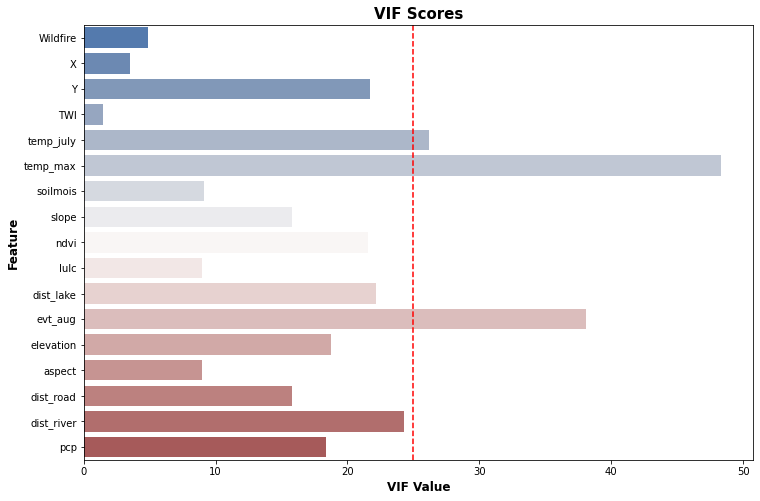

In [51]:
def plot_vif(vif_data):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Plot the VIF values
    sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)
    ax.axvline(x=25, color="red", linestyle="--")  # Add a vertical line at VIF = 30
    ax.set_title('VIF Scores', fontweight='bold', fontsize=15)
    ax.set_xlabel('VIF Value', fontweight='bold', fontsize=12)
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12)

    # Display the plot
    plt.show()

plot_vif(vif_data)

## Feature Importance

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Create the feature matrix X and the target variable y

X = New_df_train[
    ['X', 'Y', 'TWI', 'temp_july', 'temp_max', 'soilmois', 'slope',
     'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road', 'dist_river', 'pcp']
]
y = New_df_train['Wildfire']

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Calculate the sum of importances
total_importance = feature_importance['Importance'].sum()

# Calculate the weights by dividing each importance by the total importance
feature_importance['Weight'] = feature_importance['Importance'] / total_importance

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importances with weights
print(feature_importance)


       Feature  Importance    Weight
7         ndvi    0.238312  0.238312
8         lulc    0.138047  0.138047
10     evt_aug    0.120998  0.120998
4     temp_max    0.110902  0.110902
1            Y    0.082808  0.082808
3    temp_july    0.078281  0.078281
0            X    0.059100  0.059100
13   dist_road    0.043691  0.043691
15         pcp    0.037966  0.037966
11   elevation    0.024323  0.024323
5     soilmois    0.019867  0.019867
9    dist_lake    0.015373  0.015373
6        slope    0.012257  0.012257
14  dist_river    0.008308  0.008308
12      aspect    0.005967  0.005967
2          TWI    0.003800  0.003800


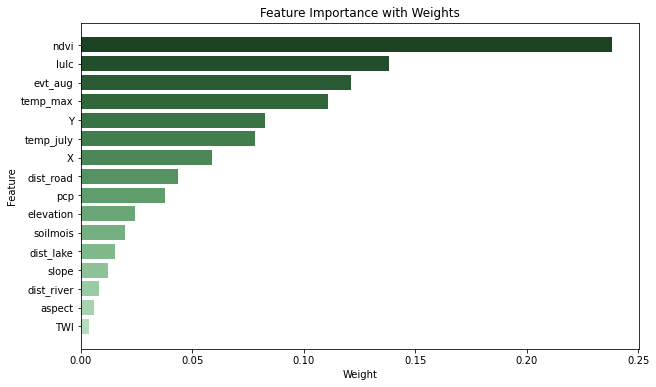

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
palette = sns.cubehelix_palette(len(feature_importance['Feature']), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Create a graph
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=palette)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance with Weights')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Show the graph
plt.show()

## SHAP value

In [ ]:
import shap

# Assuming rf is your trained RandomForestClassifier and X is your feature matrix

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# Plot SHAP values (summary plot for overall feature importance)
shap.summary_plot(shap_values[1], X)  # Index 1 for class 1 ('Wildfire') if it's a binary classification

# Alternatively, for a simpler bar plot of feature importance
shap.summary_plot(shap_values, X, plot_type="bar")

## Outlier Detection

from pyod.models.knn import KNN

# Selecting relevant features for outlier detection
columns_for_outlier_detection = [
    'X', 'Y', 'temp_july', 'temp_max', 'soilmois', 'slope', 'ndvi',
    'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road', 'dist_river', 'pcp'
]

# Extracting the relevant columns from the DataFrame
X = New_df_train[columns_for_outlier_detection].values

# Train the KNN outlier detection model
knn_model = KNN(contamination=0.1)  # Set the desired contamination level
knn_model.fit(X)

# Predict the outlier scores and labels
outlier_scores = knn_model.decision_scores_
outlier_labels = knn_model.predict(X)

# Add the outlier scores and labels to the DataFrame
New_df_train['outlier_scores'] = outlier_scores
New_df_train['outlier_labels'] = outlier_labels

# Print the instances flagged as outliers
outliers = New_df_train[New_df_train['outlier_labels'] == 1]
print("Outliers:")
print(outliers)

# Remove the outlier instances if desired
df_train_Filter = New_df_train[New_df_train['outlier_labels'] == 0]

from sklearn.ensemble import IsolationForest

# Selecting relevant features for outlier detection
columns_for_outlier_detection = [
    'temp_july', 'temp_max', 'soilmois', 'slope', 'ndvi',
    'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road', 'dist_river', 'pcp'
]
# Extracting the relevant columns from the DataFrame
X = New_df_train[columns_for_outlier_detection].values

# Train the Isolation Forest outlier detection model
isolation_forest = IsolationForest(contamination=0.1)  # Set the desired contamination level
isolation_forest.fit(X)

# Predict the outlier labels
outlier_labels = isolation_forest.predict(X)

# Add the outlier labels to the DataFrame
New_df_train['outlier_labels'] = outlier_labels

# Print the instances flagged as outliers
outliers = New_df_train[New_df_train['outlier_labels'] == -1]
print("Outliers:")
print(outliers)

# Remove the outlier instances if desired
df_train_Filter2 = New_df_train[New_df_train['outlier_labels'] == 1]
df_train_Filter2.reset_index(drop=True, inplace=True)


## Applying standard scaler to numerical features which it is TWI

In [55]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data 'TWI' and transform it
twi_train = New_df_train['TWI'].values.reshape(-1, 1)
twi_scaled_train = scaler.fit_transform(twi_train)
New_df_train['TWI'] = twi_scaled_train.flatten()

# Use the already fitted scaler to transform the test data 'TWI'
twi_test = New_df_test['TWI'].values.reshape(-1, 1)
twi_scaled_test = scaler.transform(twi_test)  # Note the use of transform() instead of fit_transform()
New_df_test['TWI'] = twi_scaled_test.flatten()


In [56]:
New_df_train.head()

,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,9.779328e+05,-171014.66810,-0.001632,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,1,1.347033e+06,-80014.66811,-0.001632,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,1,9.444328e+05,-50014.66811,1.015849,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,4.0,3.0
3,1,9.470328e+05,-50814.66811,-0.001632,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,1,9.414328e+05,-51414.66811,-0.303107,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0


## Convert categorical features into a suitable format for ML using One-Hot-Encoding

In [57]:
from sklearn.preprocessing import OneHotEncoder


# Create an instance of OneHotEncoder
enc = OneHotEncoder(drop='first')

categorical_columns = [
    'temp_july', 'temp_max', 'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 
    'evt_aug', 'elevation', 'aspect', 'dist_road', 'dist_river', 'pcp'
]

# Fit the encoder on the training data's categorical columns
enc.fit(New_df_train[categorical_columns])

# Transform the training data and create a DataFrame with the encoded features
encoded_train_data = pd.DataFrame(enc.transform(New_df_train[categorical_columns]).toarray(), columns=enc.get_feature_names_out())

# Transform the test data and create a DataFrame with the encoded features
encoded_test_data = pd.DataFrame(enc.transform(New_df_test[categorical_columns]).toarray(), columns=enc.get_feature_names_out())

# Now concatenate the encoded features with the scaled 'TWI', 'X', and 'Y' columns for the training set
final_train_df = pd.concat([New_df_train[['TWI', 'X', 'Y']], encoded_train_data, New_df_train['Wildfire']], axis=1, join= 'inner')

# Now concatenate the encoded features with the scaled 'TWI', 'X', and 'Y' columns for the test set
final_test_df = pd.concat([New_df_test[['TWI', 'X', 'Y']], encoded_test_data, New_df_test['Wildfire']], axis=1, join= 'inner')

# Reset the index for the resulting DataFrames
final_train_df.reset_index(drop=True, inplace=True)
final_test_df.reset_index(drop=True, inplace=True)

# Now final_train_df and final_test_df are ready for machine learning model training


In [62]:
final_train_df.head()

,TWI,X,Y,temp_july_2.0,temp_july_3.0,temp_july_4.0,temp_july_5.0,temp_max_2.0,temp_max_3.0,temp_max_4.0,...,dist_road_4.0,dist_river_2.0,dist_river_3.0,dist_river_4.0,dist_river_5.0,pcp_2.0,pcp_3.0,pcp_4.0,pcp_5.0,Wildfire
0,-0.001632,9.779328e+05,-171014.66810,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,-0.001632,1.347033e+06,-80014.66811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,1.015849,9.444328e+05,-50014.66811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.001632,9.470328e+05,-50814.66811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,-0.303107,9.414328e+05,-51414.66811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [58]:
final_train_df[final_train_df.isnull().any(axis= 1)]

,TWI,X,Y,temp_july_2.0,temp_july_3.0,temp_july_4.0,temp_july_5.0,temp_max_2.0,temp_max_3.0,temp_max_4.0,...,dist_road_4.0,dist_river_2.0,dist_river_3.0,dist_river_4.0,dist_river_5.0,pcp_2.0,pcp_3.0,pcp_4.0,pcp_5.0,Wildfire


## Training Machine Learning Models

### 1- Random Forest model

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix

In [87]:
# Drop X and Y coordinates form X and Y train and test
X_train = final_train_df.drop(['X', 'Y', 'Wildfire'], axis= 1)
y_train = final_train_df['Wildfire']
X_test = final_test_df.drop(['X' ,'Y', 'Wildfire'], axis= 1)
y_test = final_test_df['Wildfire']

### JUST FOR TEST

In [94]:
# Drop X and Y coordinates form X and Y train and test
X_train = final_train_df.drop(['X', 'Y', 'TWI','Wildfire'], axis= 1)
y_train = final_train_df['Wildfire']
X_test = final_test_df.drop(['X' ,'Y', 'TWI','Wildfire'], axis= 1)
y_test = final_test_df['Wildfire']

In [95]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the model
rf_model.fit(X_train, y_train)  # Train the model

RandomForestClassifier(random_state=42)

In [96]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfc, X_train, y_train, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: Accuracy = {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Fold 1: Accuracy = 0.987528543825751
Fold 2: Accuracy = 0.9873528895134376
Fold 3: Accuracy = 0.9871772352011242
Fold 4: Accuracy = 0.9855938158819396
Fold 5: Accuracy = 0.986120871398454
Mean Accuracy: 0.9867546711641413


In [97]:
# Predict on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model (e.g., accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.99


In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3411
           1       0.99      0.99      0.99      3708

    accuracy                           0.99      7119
   macro avg       0.99      0.99      0.99      7119
weighted avg       0.99      0.99      0.99      7119



In [100]:
# Get probabilities for the positive class (usually class '1')
y_probabilities = rf_model.predict_proba(X_test)[:, 1]


In [101]:
# Predict on the test set
y_predictions = rf_model.predict(X_test)
